- 1. retrieve the data from this kaggle link
- 2. install texblob onto your conda environment
- 3. launch jupyter notebook in the same environment, and import pandas, matplotlib/seaborn and textblob

In [ ]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

- 4. read the data into a dataframe with pandas

In [2]:
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

- use df.columns.str.lower() (or other preferred method) to standardise your column headers

In [3]:
df.columns = df.columns.str.replace(' ','_')

In [4]:
cols=[]
for i in range(len(df.columns)):
    cols.append(df.columns[i].lower())

In [5]:
df.columns=cols

- filter the data frame to a relevant subset of columns required for our data scenario (image clothing_columns.png)

In [6]:
dfr=df[['title', 'review_text', 'rating', 'division_name', 'department_name']]

- EDA - with descriptive statistics (eg describe(), shape, info()) and/or simple charts, explore and familiarise yourself with the data at your own pace - clarify what each column means/contains and what cleaning steps could be employed (and if needed for our scenario)

In [7]:
dfr.shape

(23486, 5)

In [8]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review_text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division_name    23472 non-null  object
 4   department_name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


In [9]:
dfr.dropna(subset=['title', 'review_text', 'division_name', 'department_name'], inplace=True)

<ipython-input-9-6ff059d7683f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr.dropna(subset=['title', 'review_text', 'division_name', 'department_name'], inplace=True)


In [10]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19662 entries, 2 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19662 non-null  object
 1   review_text      19662 non-null  object
 2   rating           19662 non-null  int64 
 3   division_name    19662 non-null  object
 4   department_name  19662 non-null  object
dtypes: int64(1), object(4)
memory usage: 921.7+ KB


In [11]:
dfr.reset_index()

,index,title,review_text,rating,division_name,department_name
0,2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
1,3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
2,4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops
3,5,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,General,Dresses
4,6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,General Petite,Tops
...,...,...,...,...,...,...
19657,23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,General Petite,Dresses
19658,23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,General Petite,Tops
19659,23483,"Cute, but see through","This fit well, but the top was very see throug...",3,General Petite,Dresses
19660,23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,General,Dresses


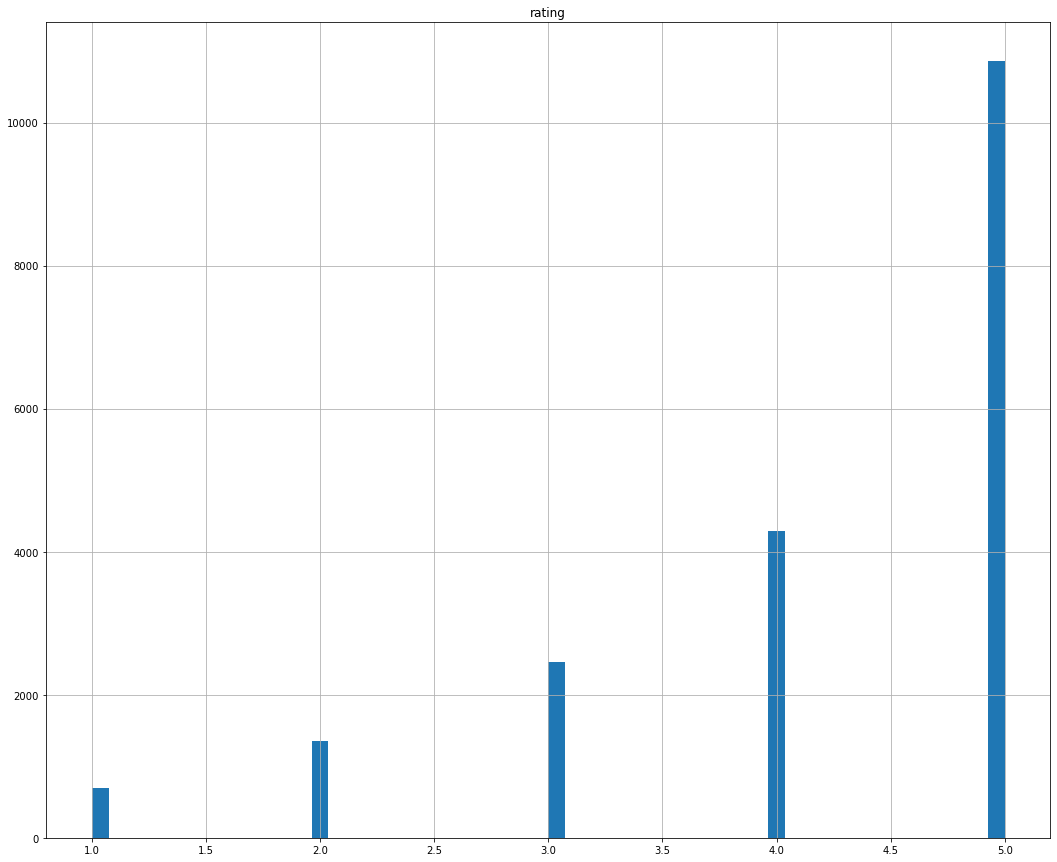

In [12]:
dfr.hist(figsize=(18,15), bins='auto');

- use the pandas groupby function to summarise the average rating by division and department as a new dataframe (image clothing_rating_groupby.png)

In [44]:
dfr_gb = dfr.groupby(['division_name','department_name']).agg({'rating':'mean'}).reset_index()

In [45]:
dfr_gb

,division_name,department_name,rating
0,General,Bottoms,4.263083
1,General,Dresses,4.150079
2,General,Jackets,4.239488
3,General,Tops,4.138255
4,General,Trend,3.875000
5,General Petite,Bottoms,4.336783
6,General Petite,Dresses,4.118314
7,General Petite,Intimate,4.223404
8,General Petite,Jackets,4.322289
9,General Petite,Tops,4.191582


- this dataframe can be easily visualised as a bar chart - do so now (image clothing_rating_chart.png)

In [46]:
dfr_gb['div_dep']=dfr_gb['division_name'] + " " + dfr_gb['department_name']

<AxesSubplot:ylabel='div_dep'>

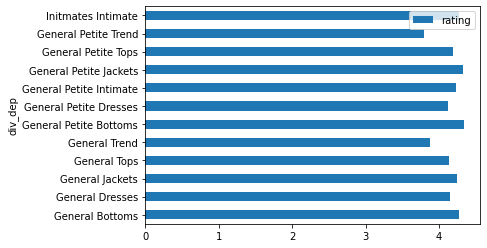

In [47]:
dfr_gb.plot(kind="barh", y='rating', x='div_dep')

- do a spot /sample check on the review column, index position 5 (hint: iloc/loc/at) to apply textblob over the selected review text (image clothing_sentiment_index5.png) Do this for at least 3 samples to evaluate the accuracy of the sentiment polarity and subjectivity against the text itself

In [88]:
text=dfr.iloc[5]['review_text']

In [89]:
testimonial=TextBlob(text)

In [90]:
testimonial.sentiment

Sentiment(polarity=0.17163461538461539, subjectivity=0.49615384615384617)

- using dropna, remove any rows in your data which contain have null in the review column ( hint your new data will be 22641 rows)

In [91]:
dfr['review_text'].isna().sum()
#I dropped all nulls when cleaning the data. 

0

- define a function with lambda (or other preferred method) to calculate sentiment polarity for each row of the filtered review data set, as a new column on the data frame. (image clothing_sentiment_allrows.png)

In [92]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [93]:
dfr['polarity']= dfr['review_text'].apply(get_polarity)

<ipython-input-93-fa2345fe6bab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr['polarity']= dfr['review_text'].apply(get_polarity)


In [94]:
print(dfr['polarity'])

2        0.073675
3        0.550000
4        0.512891
5        0.178750
6        0.133750
           ...   
23481    0.552667
23482    0.091667
23483    0.414286
23484    0.322222
23485    0.413889
Name: polarity, Length: 19662, dtype: float64


- using the pandas groupby function again, summarise the minimum review polarity, by division and department as a new dataframe (image clothing_min_review.png) - this means whats the lowest sentiment score seen in each department and division - so everything will be less than 0

In [105]:
dfr_div_dep = dfr.groupby(['division_name', 'department_name']).agg({'rating':'mean'}).reset_index()

In [106]:
dfr_div_dep["div_dep"] = dfr_div_dep['division_name'] + " " + dfr_div_dep['department_name']

<AxesSubplot:ylabel='div_dep'>

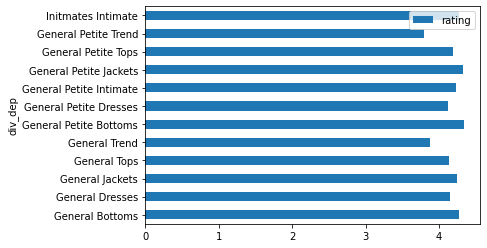

In [109]:
dfr_div_dep.plot(kind='barh', y='rating', x='div_dep')

- using the pandas groupby function again, summarise the minimum review polarity, by division and department as a new dataframe (image clothing_min_review.png) - this means whats the lowest sentiment score seen in each department and division - so everything will be less than 0

In [114]:
df_min_pol = dfr.groupby(['division_name', 'department_name']).agg({'polarity':'min'}).reset_index()

In [115]:
df_min_pol['div_dep'] = df_min_pol['division_name'] + " " + df_min_pol['department_name']

visualise this summary as a simple sorted bar chart (image clothing_min_review_chart.png)

<AxesSubplot:ylabel='div_dep'>

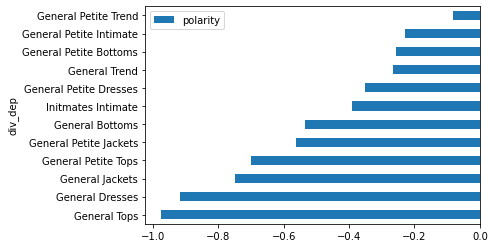

In [116]:
df_min_pol = df_min_pol.sort_values(by='polarity')
df_min_pol.plot(kind="barh", y='polarity', x='div_dep')